## How do I read a tabular data file into pandas? 

In [33]:
tsv - \t
csv  - ,
txt   - \t,',',|

xlsx

SyntaxError: unexpected character after line continuation character (<ipython-input-33-0d30c95e164d>, line 1)

In [34]:
import pandas as pd
# read a dataset of Chipotle orders directly from a URL and store the results in a DataFrame
orders = pd.read_table('http://bit.ly/chiporders',sep='\t')

In [35]:
# examine the first 5 rows
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


Documentation for [**`read_table`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)

In [36]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user = pd.read_csv(r"C:\Users\Guhan\Documents\Verzeo\user.txt",sep='|', header=None, names=user_cols) # r is for raw string. It is used to treat the string ahead of it as a single string without escape sequences.

FileNotFoundError: [Errno 2] File C:\Users\Guhan\Documents\Verzeo\user.txt does not exist: 'C:\\Users\\Guhan\\Documents\\Verzeo\\user.txt'

In [ ]:
# csv - '','', tsv - \t, txt -

In [ ]:
# pd.read_excel('.xlsx',sheet_name='Sheet1')

In [ ]:
# examine the first 5 rows
user.head()

In [ ]:
#last 10 entries
user.tail(10)

## How do I select a pandas Series from a DataFrame?

In [ ]:
# read a dataset of UFO reports into a DataFrame
import pandas as pd
ufo = pd.read_table('ufo.csv', sep=',')

In [ ]:
# read_csv is equivalent to read_table, except it assumes a comma separator
ufo = pd.read_csv('ufo.csv')

In [ ]:
# examine the first 5 rows
ufo.head()

In [ ]:
# select the 'City' Series using bracket notation
ufo['City']

# or equivalently, use dot notation
ufo.State #2

<!-- **Bracket notation** will always work, whereas **dot notation** has limitations: -->

- Dot notation doesn't work if there are **spaces** in the Series name
- Dot notation doesn't work if the Series has the same name as a **DataFrame method or attribute** (like 'head' or 'shape')
- Dot notation can't be used to define the name of a **new Series** (see below)

In [ ]:
# create a new 'Location' Series (must use bracket notation to define the Series name)
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

In [ ]:
ufo.shape

## Why do some pandas commands end with parentheses (and others don't)?

In [ ]:
# read a dataset of top-rated IMDb movies into a DataFrame
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')

**Methods** end with parentheses, while **attributes** don't:

In [ ]:
# example method: show the first 5 rows
movies.head()

In [ ]:
movies.genre.nunique()

In [ ]:
movies.genre.unique()

In [ ]:
# example method: calculate summary statistics
movies.describe()

In [ ]:
movies.info()

In [ ]:
# example attribute: number of rows and columns
movies.shape

In [ ]:
# example attribute: data type of each column
movies.dtypes

In [ ]:
# use an optional parameter to the describe method to summarize only 'object' columns
movies.describe(include='object')

Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

## 5. How do I rename columns in a pandas DataFrame? 

In [ ]:
ufo = pd.read_csv('ufo.csv')

In [ ]:
# examine the column names
ufo.columns

In [ ]:
x = 10
# addition followed by assign
x+=10 - 20
# addtion
x+10 - x

In [ ]:
# rename two of the columns by using the 'rename' method
ufo.columns = ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'})
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Documentation for [**`rename`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [ ]:
ufo.columns

In [ ]:
# replace all of the column names by overwriting the 'columns' attribute
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.columns

In [ ]:
# replace the column names during the file reading process by using the 'names' parameter
import pandas as pd
ufo = pd.read_csv('ufo.csv', header=0, names=ufo_cols)
ufo.columns

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [ ]:
# replace all spaces with underscores in the column names by using the 'str.replace' method
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.columns

Documentation for [**`str.replace`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html)

##  How do I remove columns from a pandas DataFrame? 

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('ufo.csv')
ufo.head()

In [ ]:
# remove a single column (axis=1 refers to columns)
ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.head()

Documentation for [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [ ]:
# remove multiple columns at once
ufo.drop(['City', 'State'], axis=1, inplace=True)
ufo.head()

In [ ]:
ufo.head(10)

In [ ]:
ufo.reset_index(inplace=True)

In [ ]:
ufo.head()

In [ ]:
# remove multiple rows at once (axis=0 refers to rows)
ufo.drop([2,9], axis=0, inplace=True)
# ufo.reset_index()

## How do I sort a pandas DataFrame or a Series?

In [ ]:
# read a dataset of top-rated IMDb movies into a DataFrame
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

**Note:** None of the sorting methods below affect the underlying data. (In other words, the sorting is temporary).

In [ ]:
# sort the 'title' Series in ascending order (returns a Series)
movies.star_rating.sort_values().head()

In [ ]:
# sort in descending order instead
movies.star_rating.sort_values(ascending=False).head()

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html) for a **Series**. (Prior to version 0.17, use [**`order`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.order.html) instead.)

In [ ]:
# sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('title').head()

In [ ]:
# sort in descending order instead
movies.sort_values('title', ascending=False).head()

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) for a **DataFrame**. (Prior to version 0.17, use [**`sort`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sort.html) instead.)

In [ ]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['star_rating', 'duration','content_rating'],ascending=[False,True,True]).head(10)


## How do I filter rows of a pandas DataFrame by column value?

In [ ]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

In [ ]:
# examine the number of rows and columns
movies.shape

**Goal:** Filter the DataFrame rows to only show movies with a 'duration' of at least 200 minutes.

In [ ]:
movies.duration

In [ ]:
# create a list in which each element refers to a DataFrame row: True if the row satisfies the condition, False otherwise
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [ ]:
booleans = [True if length>=200 else False for length in movies.duration]
booleans

In [ ]:
# confirm that the list has the same length as the DataFrame
len(booleans)

In [ ]:
# examine the first five list elements
booleans[0:5]

In [ ]:
# convert the list to a Series
is_long = pd.Series(booleans)
is_long.head(10)

In [ ]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
movies[is_long]

In [ ]:
movies.duration >= 200

In [ ]:
movies[movies.duration >= 200]

In [ ]:
# simplify the steps above: no need to write a for loop to create 'is_long' since pandas will broadcast the comparison
is_long = movies.duration >= 200
movies[is_long]

# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration >= 200]

In [ ]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

# or equivalently, use the 'loc' method
# movies.loc[0:2,'star_rating']  # t OR f  OR INDEX , COLUMN NAME

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

## How do I apply multiple filter criteria to a pandas DataFrame? 

In [37]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
# filter the DataFrame to only show movies with a 'duration' of at least 200 minutes
movies[movies.duration >= 200]

Understanding **logical operators:**

- **`and`**: True only if **both sides** of the operator are True
- **`or`**: True if **either side** of the operator is True

In [ ]:
# demonstration of the 'and' operator
print(True and True)
print(True and False)
print(False and False)

In [ ]:
# demonstration of the 'or' operator
print(True or True)
print(True or False)
print(False or False)

Rules for specifying **multiple filter criteria** in pandas:

- use **`&`** instead of **`and`**
- use **`|`** instead of **`or`**
- add **parentheses** around each condition to specify evaluation order

**Goal:** Further filter the DataFrame of long movies (duration >= 200) to only show movies which also have a 'genre' of 'Drama'

In [ ]:
# CORRECT: use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

In [ ]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

**Goal:** Filter the original DataFrame to show movies with a 'genre' of 'Crime' or 'Drama' or 'Action'

In [ ]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)
movies[movies.genre.isin(['Crime','Drame','Action'])].title

Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

### When reading from a file, how do I read in only a subset of the columns?

In [ ]:
# read a dataset of UFO reports into a DataFrame, and check the columns
import pandas as pd
ufo = pd.read_csv('ufo.csv')
ufo.columns

In [ ]:
# specify which columns to include by name
ufo = pd.read_csv('ufo.csv', usecols=['City', 'State'])
print(ufo.columns)
# or equivalently, specify columns by position
ufo = pd.read_csv('ufo.csv', usecols=[0, 4])
ufo.columns

In [ ]:
ufo.head()

**Question:** When reading from a file, how do I read in only a subset of the rows?

In [ ]:
# specify how many rows to read
ufo = pd.read_csv('ufo.csv', nrows=3)
ufo

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

Documentation for [**`select_dtypes`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html)

## How do I use string methods in pandas? 

In [ ]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

In [ ]:
# normal way to access string methods in Python
'hello'.upper()

In [ ]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()

In [ ]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

In [ ]:
# use the boolean Series to filter the DataFrame
orders[orders.item_name.str.contains('Chicken')].head()

In [ ]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').str.replace(',',' ').head()

In [ ]:
# many pandas string methods support regular expressions (regex)
orders.choice_description.str.replace('[\[\]\(\)\,]', '').head()

[String handling section](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) of the pandas API reference

## How do I change the data type of a pandas Series?

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

In [12]:
# examine the data type of each Series
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [13]:
# change the data type of an existing Series
drinks['beer_servings'] = drinks.beer_servings.astype(float)
# drinks['country'] = drinks.country.astype(int)  <-- Not possible
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Documentation for [**`astype`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html)

In [14]:
# alternatively, change the data type of a Series while reading in a file
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [15]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [16]:
# examine the data type of each Series
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [17]:
# convert a string to a number in order to do math
orders.item_price.str.replace('$', '').astype(float).mean()

7.464335785374397

In [18]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [19]:
# convert a boolean Series to an integer (False = 0, True = 1)
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

## When should I use a "groupby" in pandas?

In [20]:
# read a dataset of alcohol consumption into a DataFrame
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [21]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [22]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [23]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [24]:
drinks.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [25]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

Documentation for [**`groupby`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [26]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [27]:
# multiple aggregation functions can be applied simultaneously
import numpy as np

drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max','sum'])

,count,mean,min,max,sum
continent,,,,,
Africa,53,61.471698,0,376,3258
Asia,44,37.045455,0,247,1630
Europe,45,193.777778,0,361,8720
North America,23,145.434783,1,285,3345
Oceania,16,89.687500,0,306,1435
South America,12,175.083333,93,333,2101


Documentation for [**`agg`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [28]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [29]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [30]:
# allow plots to appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

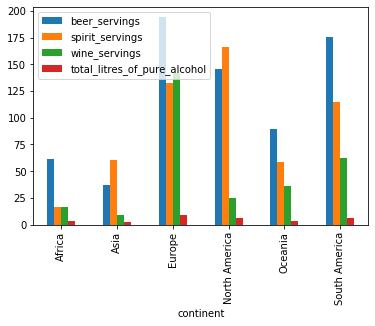

In [31]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')


Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

In [38]:
# count how many times each value in the Series occurs
movies.genre.value_counts()


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [40]:
movies.genre.nunique()

16

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [ ]:
movies.head(10)

In [39]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [ ]:
# 'value_counts' (like many pandas methods) outputs a Series
type(movies.genre.value_counts())

In [ ]:
# display the unique values in the Series
movies.genre.unique()

In [ ]:
# count the number of unique values in the Series
movies.genre.nunique()

Documentation for [**`unique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) and [**`nunique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html)

In [ ]:
print(movies.content_rating.nunique())
movies.genre.nunique()

In [41]:
genre - 16 
content_rating -12
12*16 = 192


SyntaxError: can't assign to operator (<ipython-input-41-674e794f2d9f>, line 3)

In [42]:
# compute a cross-tabulation of two Series
pd.crosstab(movies.genre, movies.content_rating,margins=True)
# genre.action, content_Rating.approved - 3

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X,All
genre,,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0,135
Adventure,3,2,0,0,5,1,21,23,17,0,2,0,74
Animation,3,20,0,0,3,0,25,5,5,0,1,0,62
Biography,1,2,1,0,1,0,6,29,36,0,0,0,76
Comedy,9,2,1,1,16,3,23,23,73,0,4,1,156
Crime,6,0,0,1,7,1,6,4,87,0,11,1,124
Drama,12,3,0,4,24,1,25,55,143,1,9,1,278
Family,0,1,0,0,0,0,1,0,0,0,0,0,2
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0,1


Documentation for [**`crosstab`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

**Exploring a numeric Series:**

In [ ]:
# calculate various summary statistics
movies.duration.describe()

In [ ]:
# many statistics are implemented as Series methods
movies.duration.mean()

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)

In [ ]:
# 'value_counts' is primarily useful for categorical data, not numerical data
movies.duration.value_counts.head()

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline

In [ ]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

In [ ]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

## How do I handle missing values in pandas? 

In [43]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


**What does "NaN" mean?**

- "NaN" is not a string, rather it's a special value: **`numpy.nan`**.
- It stands for "Not a Number" and indicates a **missing value**.
- **`read_csv`** detects missing values (by default) when reading the file, and replaces them with this special value.

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [44]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [ ]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [**`notnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

In [45]:
# count the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

This calculation works because:

1. The **`sum`** method for a DataFrame operates on **`axis=0`** by default (and thus produces column sums).
2. In order to add boolean values, pandas converts **`True`** to **1** and **`False`** to **0**.

In [ ]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

**How to handle missing values** depends on the dataset as well as the nature of your analysis. Here are some options:

In [46]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

In [49]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

Documentation for [**`dropna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [ ]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

In [ ]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

In [50]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [ ]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

In [54]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [52]:
# explicitly include missing values
ufo['City'].value_counts(dropna=False).head()

Seattle          187
New York City    161
Phoenix          137
Houston          108
Las Vegas        105
Name: City, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [55]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)
# ufo['Shape Reported'].isnull().sum()

Documentation for [**`fillna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [59]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts()

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
FLARE           1
PYRAMID         1
DOME            1
Name: Shape Reported, dtype: int64

[Working with missing data in pandas](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

## What do I need to know about the pandas index?

In [1]:
# read a dataset of alcohol consumption into a DataFrame
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
# every DataFrame has an index (sometimes called the "row labels")
drinks.index

In [ ]:
# column names are also stored in a special "index" object
drinks.columns

In [ ]:
# neither the index nor the columns are included in the shape
drinks.shape

In [ ]:
# index and columns both default to integers if you don't define them
pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head()

**What is the index used for?**

1. identification
2. selection
3. alignment 

In [ ]:
# identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America']

In [ ]:
# r,c
# loc - [index,'col name']
# iloc - [index,index]
# index <-> true,false

In [2]:
# selection: select a portion of the DataFrame using the index
drinks.loc[0:10, 'beer_servings']

0       0
1      89
2      25
3     245
4     217
5     102
6     193
7      21
8     261
9     279
10     21
Name: beer_servings, dtype: int64

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

In [4]:
drinks.iloc[0:10,0:2]

,country,beer_servings
0,Afghanistan,0
1,Albania,89
2,Algeria,25
3,Andorra,245
4,Angola,217
5,Antigua & Barbuda,102
6,Argentina,193
7,Armenia,21
8,Australia,261
9,Austria,279


In [ ]:
# set an existing column as the index
drinks.set_index('country', inplace=True)
drinks.head()

Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [ ]:
# 'country' is now the index
drinks.index

In [ ]:
# 'country' is no longer a column
drinks.columns

In [ ]:
# 'country' data is no longer part of the DataFrame contents
drinks.shape

In [ ]:
# country name can now be used for selection
drinks.loc['Brazil', 'beer_servings']

In [ ]:
# index name is optional
drinks.index.name = None
drinks.head()

In [ ]:
# restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

Documentation for [**`reset_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

In [ ]:
# many DataFrame methods output a DataFrame
drinks.describe()

In [ ]:
# you can interact with any DataFrame using its index and columns
drinks.describe().loc['25%', 'beer_servings']

[Indexing and selecting data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## How do I select multiple rows and columns from a pandas DataFrame? 

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head(3)

The [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method is used to select rows and columns by **label**. You can pass it:

- A single label
- A list of labels
- A slice of labels
- A boolean Series
- A colon (which indicates "all labels")

In [ ]:
# row 0, all columns
ufo.loc[0, :]

In [ ]:
# rows 0 and 1 and 2, all columns
ufo.loc[[0, 1, 2], :]

In [ ]:
# rows 0 through 2 (inclusive), all columns
ufo.loc[0:2, :]

In [ ]:
# this implies "all columns", but explicitly stating "all columns" is better
ufo.loc[0:2]

In [ ]:
# rows 0 through 2 (inclusive), column 'City'
ufo.loc[0:2, 'City']

In [ ]:
# rows 0 through 2 (inclusive), columns 'City' and 'State'
ufo.loc[0:2, ['City', 'State']]

In [ ]:
# accomplish the same thing using double brackets - but using 'loc' is preferred since it's more explicit
ufo[['City', 'State']].head(3)

In [ ]:
# rows 0 through 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

In [ ]:
# accomplish the same thing using 'head' and 'drop'
ufo.head(3).drop('Time', axis=1)

In [ ]:
# rows in which the 'City' is 'Oakland', column 'State'
ufo.loc[ufo.City=='Oakland', 'State']

In [ ]:
# accomplish the same thing using "chained indexing" - but using 'loc' is preferred since chained indexing can cause problems
ufo[ufo.City=='Oakland'].State

The [**`iloc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) method is used to select rows and columns by **integer position**. You can pass it:

- A single integer position
- A list of integer positions
- A slice of integer positions
- A colon (which indicates "all integer positions")

In [ ]:
ufo.head()

In [ ]:
# rows in positions 0 and 1, columns in positions 0 and 3
ufo.iloc[[0, 1], [0, 3]]

In [ ]:
# rows in positions 0 through 2 (exclusive), columns in positions 0 through 4 (exclusive)
ufo.iloc[0:2, 0:4]

In [ ]:
# rows in positions 0 through 2 (exclusive), all columns
ufo.iloc[0:2, :]

In [ ]:
# accomplish the same thing - but using 'iloc' is preferred since it's more explicit
ufo[0:2]

In [4]:
# read a dataset of alcohol consumption into a DataFrame and set 'country' as the index
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [ ]:
# use the 'category' data type (new in pandas 0.15) to store the 'continent' strings as integers
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes

In [ ]:
# 'continent' Series appears to be unchanged
drinks.continent.head()

In [ ]:
7 - africa - 0 


In [ ]:
# strings are now encoded (0 means 'Africa', 1 means 'Asia', 2 means 'Europe', etc.)
drinks.continent.cat.codes.head()

In [ ]:
# memory usage has been drastically reduced
drinks.memory_usage(deep=True)

In [ ]:
# repeat this process for the 'country' Series
drinks.index = drinks.index.astype('category')
drinks.memory_usage(deep=True)

In [ ]:
# memory usage increased because we created 193 categories
drinks.country.cat.categories

The **category** data type should only be used with a string Series that has a **small number of possible values**.

In [ ]:
goodl

In [5]:
# create a small DataFrame from a dictionary
import pandas as pd
df = pd.DataFrame({'ID':[100, 101, 102, 103], 'quality':['good', 'very good', 'good', 'excellent']})
df


,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [6]:
# sort the DataFrame by the 'quality' Series (alphabetical order)
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [7]:
# define a logical ordering for the categories
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['good', 'very good', 'excellent'], ordered=True)
df['quality'] = df.quality.astype(cat_type)
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [8]:
# sort the DataFrame by the 'quality' Series (logical order)
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [9]:
# comparison operators work with ordered categories
df.loc[df.quality > 'good', :]

,ID,quality
1,101,very good
3,103,excellent


[Overview of categorical data in pandas](http://pandas.pydata.org/pandas-docs/stable/categorical.html)

[API reference for categorical methods](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical)



## How do I create dummy variables in pandas?

In [10]:
# read the training dataset from Kaggle's Titanic competition
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# create the 'Sex_male' dummy variable using the 'map' method
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Documentation for [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)

In [14]:
# alternative: use 'get_dummies' to create one column for every possible value
pd.get_dummies(train.Sex,prefix = 'Sex',prefix_sep='_',drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


Generally speaking:

- If you have **"K" possible values** for a categorical feature, you only need **"K-1" dummy variables** to capture all of the information about that feature.
- One convention is to **drop the first dummy variable**, which defines that level as the "baseline".

In [ ]:
# drop the first dummy variable ('female') using the 'iloc' method
pd.get_dummies(train.Sex).iloc[:, 1:].head()

In [ ]:
# add a prefix to identify the source of the dummy variables
pd.get_dummies(train.Sex, prefix='Sex').iloc[:, 1:].head()

In [15]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train.Embarked.head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [17]:
# use 'get_dummies' with a feature that has 3 possible values
pd.get_dummies(train.Embarked, prefix='Embarked').head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [ ]:
# drop the first dummy variable ('C')
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:].head(10)

How to translate these values back to the original 'Embarked' value:

- **0, 0** means **C**
- **1, 0** means **Q**
- **0, 1** means **S**

In [18]:
# save the DataFrame of dummy variables and concatenate them to the original DataFrame
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:]
train = pd.concat([train, embarked_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

In [ ]:
# reset the DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

In [ ]:
# pass the DataFrame to 'get_dummies' and specify which columns to dummy (it drops the original columns)
pd.get_dummies(train, columns=['Sex', 'Embarked']).head()

In [ ]:
# 0
# 1
# 2

In [ ]:
#
embarked
s=0
c=1
q=2

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Embarked']= le.fit_transform(train['Embarked'])
movies

TypeError: argument must be a string or number

In [ ]:
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True).head()


Documentation for [**`get_dummies`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


## How do I work with dates and times in pandas?

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

In [ ]:
# 'Time' is currently stored as a string
ufo.dtypes

In [ ]:
# hour could be accessed using string slicing, but this approach breaks too easily
ufo.Time.str.slice(-5, -3).astype(int).head()

In [ ]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

In [ ]:
ufo.dtypes

Documentation for [**`to_datetime`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [ ]:
# convenient Series attributes are now available
ufo.Time.dt.hour.head()

In [ ]:
ufo.Time.dt.weekday_name.head()

In [ ]:
ufo.Time.dt.dayofyear.head()

API reference for [datetime properties and methods](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [ ]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

In [ ]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :].head()

In [ ]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

In [ ]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline

In [ ]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().head()

In [ ]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

## How do I find and remove duplicate rows in pandas?

In [ ]:
# read a dataset of movie reviewers into a DataFrame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

In [ ]:
users.shape

In [ ]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated().tail()

In [ ]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

In [ ]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

In [ ]:
# count the duplicate rows
users.duplicated().sum()

Logic for [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Mark duplicates as True except for the first occurrence.
- **`keep='last'`**: Mark duplicates as True except for the last occurrence.
- **`keep=False`**: Mark all duplicates as True.

In [ ]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]

In [ ]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

In [ ]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

In [ ]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first').shape

In [ ]:
users.drop_duplicates(keep='last').shape

In [ ]:
users.drop_duplicates(keep=False).shape

Documentation for [**`drop_duplicates`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [ ]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

In [ ]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

## How do I avoid a SettingWithCopyWarning in pandas?

In [ ]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

In [ ]:
# count the missing values in the 'content_rating' Series
movies.content_rating.isnull().sum()

In [ ]:
# examine the DataFrame rows that contain those missing values
movies[movies.content_rating.isnull()]

In [ ]:
# examine the unique values in the 'content_rating' Series
movies.content_rating.value_counts()

**Goal:** Mark the 'NOT RATED' values as missing values, represented by 'NaN'.

In [ ]:
# first, locate the relevant rows
movies[movies.content_rating=='NOT RATED'].head()

In [ ]:
# then, select the 'content_rating' Series from those rows
movies[movies.content_rating=='NOT RATED'].content_rating.head()

In [ ]:
# finally, replace the 'NOT RATED' values with 'NaN' (imported from NumPy)
import numpy as np
movies[movies.content_rating=='NOT RATED'].content_rating = np.nan

**Problem:** That statement involves two operations, a **`__getitem__`** and a **`__setitem__`**. pandas can't guarantee whether the **`__getitem__`** operation returns a view or a copy of the data.

- If **`__getitem__`** returns a view of the data, **`__setitem__`** will affect the 'movies' DataFrame.
- But if **`__getitem__`** returns a copy of the data, **`__setitem__`** will not affect the 'movies' DataFrame.

In [ ]:
# the 'content_rating' Series has not changed
movies.content_rating.isnull().sum()

**Solution:** Use the **`loc`** method, which replaces the 'NOT RATED' values in a single **`__setitem__`** operation.

In [ ]:
# replace the 'NOT RATED' values with 'NaN' (does not cause a SettingWithCopyWarning)
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [ ]:
# this time, the 'content_rating' Series has changed
movies.content_rating.isnull().sum()

**Summary:** Use the **`loc`** method any time you are selecting rows and columns in the same statement.

**More information:** [Modern Pandas (Part 1)](http://tomaugspurger.github.io/modern-1.html)

In [ ]:
# create a DataFrame only containing movies with a high 'star_rating'
top_movies = movies.loc[movies.star_rating >= 9, :]
top_movies

**Goal:** Fix the 'duration' for 'The Shawshank Redemption'.

In [ ]:
# overwrite the relevant cell with the correct duration
top_movies.loc[0, 'duration'] = 150

**Problem:** pandas isn't sure whether 'top_movies' is a view or a copy of 'movies'.

In [ ]:
# 'top_movies' DataFrame has been updated
top_movies

In [ ]:
# 'movies' DataFrame has not been updated
movies.head(1)

**Solution:** Any time you are attempting to create a DataFrame copy, use the [**`copy`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html) method.

In [ ]:
# explicitly create a copy of 'movies'
top_movies = movies.loc[movies.star_rating >= 9, :].copy()

In [ ]:
# pandas now knows that you are updating a copy instead of a view (does not cause a SettingWithCopyWarning)
top_movies.loc[0, 'duration'] = 150

In [ ]:
# 'top_movies' DataFrame has been updated
top_movies

Documentation on indexing and selection: [Returning a view versus a copy](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy)

Stack Overflow: [What is the point of views in pandas if it is undefined whether an indexing operation returns a view or a copy?](http://stackoverflow.com/questions/34884536/what-is-the-point-of-views-in-pandas-if-it-is-undefined-whether-an-indexing-oper)

##  How do I change display options in pandas?


In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
# only 60 rows will be displayed when printing
drinks

In [ ]:
# check the current setting for the 'max_rows' option
pd.get_option('display.max_rows')

Documentation for [**`get_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_option.html)

In [ ]:
# overwrite the current setting so that all rows will be displayed
pd.set_option('display.max_rows', None)
drinks

In [ ]:
# reset the 'max_rows' option to its default
pd.reset_option('display.max_rows')

Documentation for [**`set_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html) and [**`reset_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.reset_option.html)

In [ ]:
# the 'max_columns' option is similar to 'max_rows'
pd.get_option('display.max_columns')

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

In [ ]:
# an ellipsis is displayed in the 'Name' cell of row 1 because of the 'max_colwidth' option
pd.get_option('display.max_colwidth')

In [ ]:
# overwrite the current setting so that more characters will be displayed
pd.set_option('display.max_colwidth', 1000)
train.head()

In [ ]:
# overwrite the 'precision' setting to display 2 digits after the decimal point of 'Fare'
pd.set_option('display.precision', 2)
train.head()

In [ ]:
# add two meaningless columns to the drinks DataFrame
drinks['x'] = drinks.wine_servings * 1000
drinks['y'] = drinks.total_litres_of_pure_alcohol * 1000
drinks.head()

In [ ]:
# use a Python format string to specify a comma as the thousands separator
pd.set_option('display.float_format', '{:,}'.format)
drinks.head()

In [ ]:
# 'y' was affected (but not 'x') because the 'float_format' option only affects floats (not ints)
drinks.dtypes

In [ ]:
# view the option descriptions (including the default and current values)
pd.describe_option()

In [ ]:
# search for specific options by name
pd.describe_option('rows')

Documentation for [**`describe_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.describe_option.html)

In [ ]:
# reset all of the options to their default values
pd.reset_option('all')

## How do I create a pandas DataFrame from another object?

In [ ]:
# create a DataFrame from a dictionary (keys become column names, values become data)
pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']})

In [ ]:
# optionally specify the order of columns and define the index
df = pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']}, columns=['id', 'color'], index=['a', 'b', 'c'])
df

Documentation for [**`DataFrame`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

In [ ]:
# create a DataFrame from a list of lists (each inner list becomes a row)
pd.DataFrame([[100, 'red'], [101, 'blue'], [102, 'red']], columns=['id', 'color'])

In [ ]:
# create a NumPy array (with shape 4 by 2) and fill it with random numbers between 0 and 1
import numpy as np
arr = np.random.rand(4, 2)
arr

In [ ]:
# create a DataFrame from the NumPy array
pd.DataFrame(arr, columns=['one', 'two'])

In [ ]:
# create a DataFrame of student IDs (100 through 109) and test scores (random integers between 60 and 100)
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)})

Documentation for [**`np.arange`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and [**`np.random`**](http://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [ ]:
# 'set_index' can be chained with the DataFrame constructor to select an index
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)}).set_index('student')

Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [ ]:
# create a new Series using the Series constructor
s = pd.Series(['round', 'square'], index=['c', 'b'], name='shape')
s

Documentation for [**`Series`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

In [ ]:
# concatenate the DataFrame and the Series (use axis=1 to concatenate columns)
pd.concat([df, s], axis=1)

**Notes:**

- The Series name became the column name in the DataFrame.
- The Series data was aligned to the DataFrame by its index.
- The 'shape' for row 'a' was marked as a missing value (NaN) because that index was not present in the Series.

Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

## How do I apply a function to a pandas Series or DataFrame?

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

**Goal:** Map the existing values of a Series to a different set of values

**Method:** [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) (Series method)

In [ ]:
# map 'female' to 0 and 'male' to 1
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})
train.loc[0:4, ['Sex', 'Sex_num']]

**Goal:** Apply a function to each element in a Series

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) (Series method)

**Note:** **`map`** can be substituted for **`apply`** in many cases, but **`apply`** is more flexible and thus is recommended

In [21]:
# calculate the length of each string in the 'Name' Series
train['Name_length'] = train.Name.apply(len)
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [ ]:
# round up each element in the 'Fare' Series to the next integer
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'Fare_ceil']]

In [ ]:
# we want to extract the last name of each person
train.Name.head()

In [ ]:
# use a string method to split the 'Name' Series at commas (returns a Series of lists)
train.Name.str.split(',').head()

In [ ]:
# define a function that returns an element from a list based on position
def get_element(my_list, position):
    return my_list[position]

In [ ]:
# apply the 'get_element' function and pass 'position' as a keyword argument
train.Name.str.split(',').apply(get_element, position=0).head()

In [ ]:
# alternatively, use a lambda function
train.Name.str.split(',').apply(lambda x: x[0]).head()

**Goal:** Apply a function along either axis of a DataFrame

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) (DataFrame method)

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

In [ ]:
# select a subset of the DataFrame to work with
drinks.loc[:, 'beer_servings':'wine_servings'].head()

In [ ]:
# apply the 'max' function along axis 0 to calculate the maximum value in each column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

In [ ]:
# apply the 'max' function along axis 1 to calculate the maximum value in each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head()

In [ ]:
# use 'np.argmax' to calculate which column has the maximum value for each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head()

**Goal:** Apply a function to every element in a DataFrame

**Method:** [**`applymap`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html) (DataFrame method)

In [ ]:
# convert every DataFrame element into a float
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()

In [ ]:
# overwrite the existing DataFrame columns
drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head()